# The Deep Learning Book (Simplified)
## Part I - Applied Math and Machine Learning basics
*This is a series of blog posts on the [Deep Learning book](http://deeplearningbook.org) where I am attempting to provide a summary of each chapter highlighting the concepts that I found to be most important so that other people can use it as a starting point for reading the chapters, while including the code for reproducing some of the results. Please refer [this](http://www.deeplearningbook.org/contents/notation.html) for more clarity on notation.*

## Chapter 3: Probability and Information Theory
Everything that we observe around us has some degree of [uncertainty](https://en.wikipedia.org/wiki/Uncertainty) to it. [Probability Theory](https://en.wikipedia.org/wiki/Probability_theory) provides a mathematical framework for representing this uncertainty. In AI applications, probability theory is used in two ways:

- The law of probability specifies how an AI system should reason. For example, for those who are familiar with probability, a classification problem (e.g. given an image, classify whether the image is that of a "cat" or a "dog") can be viewed as finding $P(Y \hspace{0.1cm} | \hspace{0.1cm}  X)$, where $X$ is the input data and $Y$ is the label that we are predicting. We design our algorithms to compute or approximate (in case computing exact value is not feasible) various expressions derived using probability theory.

- Use probability and statistics to analyze the behaviour of proposed AI systems. For example, we can analyze the accuracy of a classification model by observing how many of the predictions are correct.

The sections present in this chapter are listed below. Feel free to navigate as you like: <br>

**1. Why Probability?** <br>
**2. Random Variables** <br>
**3. Probability Distributions** <br>
**4. Marginal Probability** <br>
**5. Conditional Probability** <br>
**6. The Chain Rule of Conditional Probabilities** <br>
**7. Independence and Conditional Independence** <br>
**8. Expectation, Variance and Covariance** <br>
**9. Common Probability Distributions** <br>
**10. Useful Properties of Common Functions** <br>
**11. Bayes' Rule** <br>
**11. Technical Details of Continuous Variables** <br>
**11. Information Theory** <br>
**11. Structured Probabilistic Models** <br>

### 1. Why Probability?
Although Computer Scientists and Software Engineers deal mostly with entities that are entirely deterministic, Machine Learning makes heavy use of probability theory. The main reason for this being that Machine Learning must always deal with quantities which are either uncertain or [stochastic](https://en.wikipedia.org/wiki/Stochastic)  
(non-deterministic). The possible sources of uncertainty are:
- Inherent stochasticity in the system being modelled: For example, creating theoretical scenarios such as a hypothetical card game where we assume that the cards are truly shuffled into a random order.

- Incomplete observability: When we cannot observe all the variables that drive the behaviour of a system, even deterministic systems can become stochastic, e.g. the [Monty Hall Problem](https://en.wikipedia.org/wiki/Monty_Hall_problem) where the outcome given the contestant's choice is deterministic, but from the point of view of the contestant, the outcome is uncertain.

- Incomplete modelling: When we use a model that must discard some of the information that we have observed, the discarded information leads to an uncertainty in the model predictions.

There are two types of kinds of probability:
- **Frequentist Probability**: Probability theory was originally developed to analyze the frequencies of events (which are often repeatable, e.g. drawing a certain hand of cards in a poker game). When we say that an outcome has a probability p of occuring, it means that if we repeated the experiment infinte times, then proportion p of those repititions would produce that outcome. This kind of probability, rerelated directly to the rates at which events occur, is called frequentist probability.


- **Bayesian Probability**: The above reasoning doesn't seem applicable to experiments which are not repeatable, e.g. when a doctor says that a patient has 40% chance of having the flu, the probability represents a **degree of belief**, with 1 indicating absolute certainty that the patient has the flu and 0 indicating absoluting certainty that the patient doesn't have the flu. This kind of probability, related to qualitative levels of reasoning, is called **Bayesian Probability**.

However, in order to satisfy the properties that we expect common sense reasoning about uncertainty to have, we treat both Bayesian and frequentist probabilities as exactly the same. For example, the probability that a player will win a poker game given he/she has a certain set of cards is calculated in the exact same manner as the probability that a patient has a certain disease given that he/she has certain symptoms.

### 2. Random Variables
A **random variable** is a variable, e.g. x, that can take on different values (states) randomly. Since it takes on values randomly, there must be a probability associated with each of those values. Thus, a random variable must be coupled with a **probability distribution** that specifies how likely each of the states are.

There are two types of random variables:
- Discrete: The number of states are finite or [countably infinite](https://en.wikipedia.org/wiki/Countable_set).
- Continuous: It is associated with a real value.

More details on these in the next section.

### 3. Probability Distributions

A **probability distribution** is a description of how likely a random variable or a set of random variables is, to take on each of its possible states. For example, if the random variable x can take values $\{1,2\}$, then $Pr(\text{x}= 1) = 0.4$ specifies the probability distribution of x, where the probability of x taking the value 1 is 0.4 and the probability of x taking the value 2 is 0.6. Probability distributions are described based on whether the random variable is discrete or continuous.

#### 3.1 Discrete Variables and Probability Mass functions
The probability distribution over discrete random variables is described using a **probability mass function** (PMF). Along with its random variable, it is denoted as: x ~ $P(\text{x})$. 
Note that $P(x)$ denotes $P(\text{x} = x)$, which is the probability that x = $x$. A probability mass function acting over multiple variables is called a **joint probability distribution**. $P(\text{x} = x, \text{y} = y)$ denotes the probability that x = $x$ and y = $y$ simultaneously. 

For a function $P$ to be a PMF, it must satisfy these conditions:

- The [domain](https://en.wikipedia.org/wiki/Domain_of_a_function) of P must be all possible states of x.
- $\forall x \in $ x, $ 0 \leq P(x) \leq 1$
- $ \sum_{x \in \text{x}} P(x) = 1$ (normalization)

For example, the uniform distribution on a random variable x with $k$ different states is given by: 
<br> <br>
$$ P(\text{x} - x_i) = 1/k $$

To arrive at this, let we use the normalization condition:

$$ \sum_{i = 1}^{k} P(x_i) = 1 $$

In a uniform distribution, all the states have the same probability (say p). Thus, we get:
$$ kp = 1 $$
$$ \Rightarrow p = 1/k $$

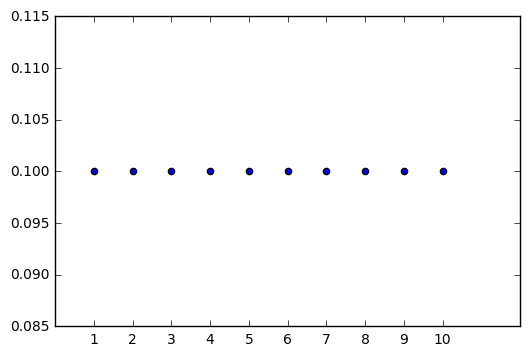

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
k = 10
x = range(1, k+1)
prob = [float(1)/k] * k
plt.scatter(x, prob)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

#### 3.2 Continuous variables and Probability Density Functions
We describe probability distributions using a **probability density function** (PDF) (denoted by $p$) when working with continuous random variables. $p$ must satisfy the following conditions to be a PDF:
- The domain of $p$ should be all the possible states of x.
- $\forall x \in$ x, $p(x) \geq 0$ i.e. $p(x)$ can be greater than 1.
- $\int p(x)dx = 1$

It's important to understand here that $p(x)$ doesn't give the probability of a specific state. The probability of landing inside an infinitesimal region with volume $\delta x$ is given by $p(x)\delta x$. Thus, the probability that $x$ lies in the interval $[a,b]$ is given by: $\int_{[a,b]} p(x)dx$. The diagram below better illustrates this.
![pdf](http://slideplayer.com/slide/8387312/26/images/12/The+Probability+Density+Function.jpg)

For example, consider a uniform distribution on an interval of real numbers. This is denoted by: $ x \sim U(a, b) $ <br>
The corresponding function $u(x; a,b)$ (";" denoting "parameterized by") is given by:

$$ 
\\ 
u(x; a,b) = 
     \begin{cases}
       \frac{1}{b-a} &\quad \text{for } x \in [a, b]\\
       0 &\quad otherwise
     \end{cases}
\\
$$

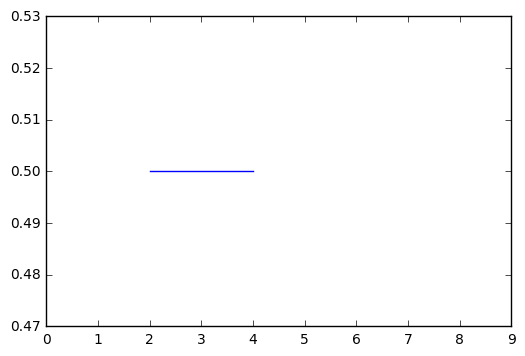

In [31]:
import matplotlib.pyplot as plt
import numpy as np

a = 2
b = 4

value = float(2) / 4
x = [a, b]
y = [value, value]
plt.plot(x, y)
plt.xticks(range(10))
plt.show()

### 4. Marginal Probability

Sometimes we know the probability distribution over a set of variables and need to find the probability over just a subset of them. The probability over the subset is called **marginal probability distribution**.

For example, if we know $P(\text{x}, \text{y})$, we can find $P(\text{x})$ as:
$$ \forall x \in \text{x}, P(\text{x} = x) = \sum_{y} P(\text{x} = x, \text{y} = y)$$

This image better illustrates how we calculate marginal probabilities: <br> <br>
![marginal pdf](http://www.statisticshowto.com/wp-content/uploads/2014/02/conditional-distribution-3.jpg)

### 5.  Conditional Probability

This is one of the most important concept in probability theory. Sometimes we are interested in calculating the probability of some event (X) , "conditioned" on the knowledge that another event (Y) has happened. It is denoted by $P(X \hspace{.1cm}| \hspace{.1cm} Y)$. For example, at the beginning of a class, the probability that a student will score well on a subject is the same for all the students. But if we are given that a particular student does well on most of his subjects, then the probability that the student will score well, given that the student scores well on most of his subjects, increases. It can be computed by the formula:

$$ P(\text{y} = y \hspace{.1cm}| \hspace{.1cm} \text{x} = x) = \frac{P(\text{y} = y , \text{x} = x)}{P(\text{x} = x)} $$

The conditional probability is defined only when $P(\text{x} = x) > 0$ as we can't condition on an event that never occurs.